In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
from sklearn.naive_bayes import GaussianNB

In [12]:
import xgboost as xgb 

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [14]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [15]:
import tensorflow as tf

In [16]:
from tensorflow import keras

In [17]:
df=pd.read_csv("Metabolic Syndrome.csv")


In [18]:
df

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,71901,48,Female,Married,1000.0,Other,NaN,59.7,0,22.11,5.8,152,57,107,0
2397,71904,30,Female,Single,2000.0,Asian,NaN,18.0,0,2.90,7.9,91,90,91,0
2398,71909,28,Male,Single,800.0,MexAmerican,100.8,29.4,0,2.78,6.2,99,47,84,0
2399,71911,27,Male,Married,8200.0,MexAmerican,106.6,31.3,0,4.15,6.2,100,41,124,1


In [19]:
df.isnull().sum()

seqn                   0
Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 281.5+ KB


In [21]:
df.describe()

,seqn,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
count,2401.000000,2401.000000,2284.000000,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,67030.674302,48.691795,4005.253940,98.307254,28.702189,0.154102,43.626131,5.489046,108.247813,53.369429,128.125364,0.342357
std,2823.565114,17.632852,2954.032186,16.252634,6.662242,0.422780,258.272829,1.439358,34.820657,15.185537,95.322477,0.474597
min,62161.000000,20.000000,300.000000,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000,0.000000
25%,64591.000000,34.000000,1600.000000,86.675000,24.000000,0.000000,4.450000,4.500000,92.000000,43.000000,75.000000,0.000000
50%,67059.000000,48.000000,2500.000000,97.000000,27.700000,0.000000,7.070000,5.400000,99.000000,51.000000,103.000000,0.000000
75%,69495.000000,63.000000,6200.000000,107.625000,32.100000,0.000000,13.690000,6.400000,110.000000,62.000000,150.000000,1.000000
max,71915.000000,80.000000,9000.000000,176.000000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1562.000000,1.000000


In [22]:
df.shape

(2401, 15)

In [23]:
mod_val=df['Marital'].mode()[0]


In [24]:
df['Marital']=df['Marital'].fillna(mod_val)

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

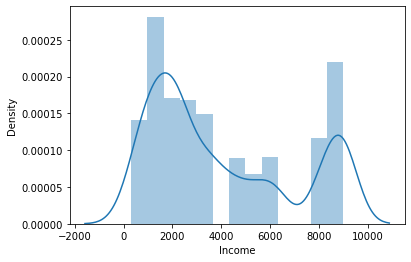

In [25]:
sns.distplot(df['Income'])

In [26]:
mean_val=df['Income'].mean()

In [27]:
df['Income']=df['Income'].fillna(mean_val)

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='WaistCirc', ylabel='Density'>

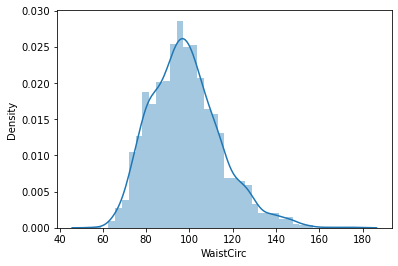

In [28]:
sns.distplot(df['WaistCirc'])

In [29]:
mean_val=df['WaistCirc'].mean()

In [30]:
df['WaistCirc']=df['WaistCirc'].fillna(mean_val)

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMI', ylabel='Density'>

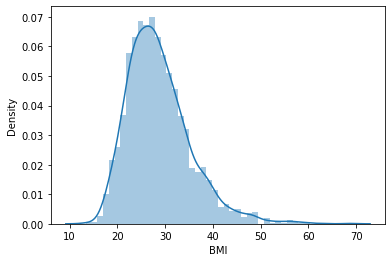

In [31]:
sns.distplot(df['BMI'])

In [32]:
mean_val=df['BMI'].mean()

In [33]:
df['BMI']=df['BMI'].fillna(mean_val)

In [34]:
df.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.00000,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.00000,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.00000,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.00000,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,Male,Married,4005.25394,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0


In [35]:
df=df.drop('seqn',axis=1)


In [36]:
df.describe()

,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
count,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,48.691795,4005.253940,98.307254,28.702189,0.154102,43.626131,5.489046,108.247813,53.369429,128.125364,0.342357
std,17.632852,2881.128031,15.962233,6.626057,0.422780,258.272829,1.439358,34.820657,15.185537,95.322477,0.474597
min,20.000000,300.000000,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000,0.000000
25%,34.000000,1600.000000,87.000000,24.000000,0.000000,4.450000,4.500000,92.000000,43.000000,75.000000,0.000000
50%,48.000000,3500.000000,97.500000,27.800000,0.000000,7.070000,5.400000,99.000000,51.000000,103.000000,0.000000
75%,63.000000,6200.000000,107.200000,32.000000,0.000000,13.690000,6.400000,110.000000,62.000000,150.000000,1.000000
max,80.000000,9000.000000,176.000000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1562.000000,1.000000


<AxesSubplot:xlabel='Sex', ylabel='count'>

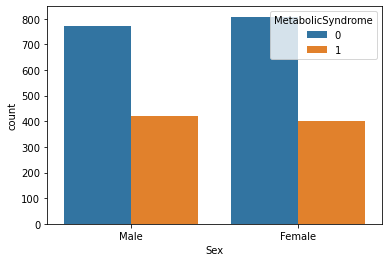

In [37]:
sns.countplot(x=df['Sex'],hue=df['MetabolicSyndrome'])

<AxesSubplot:xlabel='Marital', ylabel='count'>

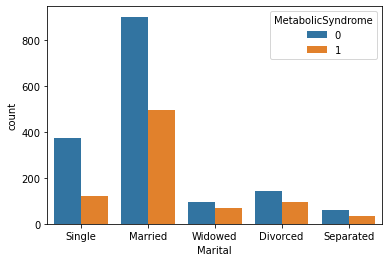

In [38]:
sns.countplot(x=df['Marital'],hue=df['MetabolicSyndrome'])

<AxesSubplot:xlabel='Race', ylabel='count'>

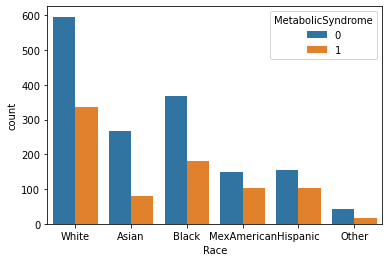

In [39]:
sns.countplot(x=df['Race'],hue=df['MetabolicSyndrome'])

<AxesSubplot:xlabel='Albuminuria', ylabel='count'>

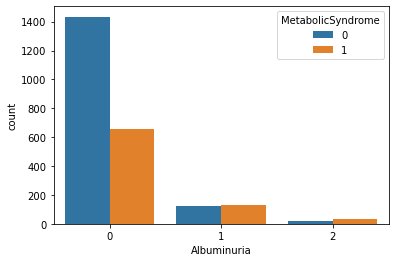

In [40]:
sns.countplot(x=df['Albuminuria'],hue=df['MetabolicSyndrome'])

In [41]:
df.head()

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,22,Male,Single,8200.00000,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,44,Female,Married,4500.00000,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,21,Male,Single,800.00000,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,43,Female,Single,2000.00000,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,51,Male,Married,4005.25394,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0


<AxesSubplot:xlabel='Sex', ylabel='Income'>

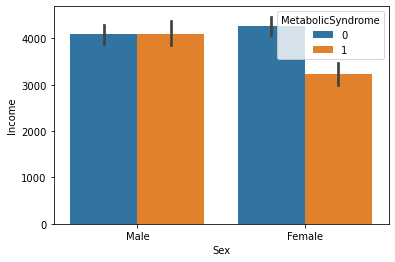

In [42]:
sns.barplot(x=df['Sex'],y=df['Income'],hue=df['MetabolicSyndrome'])

<AxesSubplot:xlabel='Marital', ylabel='Income'>

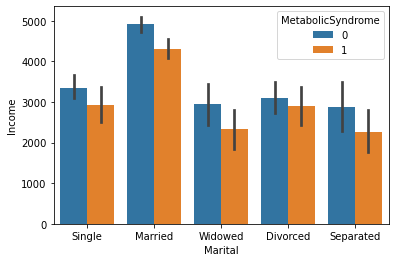

In [43]:
sns.barplot(x=df['Marital'],y=df['Income'],hue=df['MetabolicSyndrome'])

<AxesSubplot:xlabel='Race', ylabel='Income'>

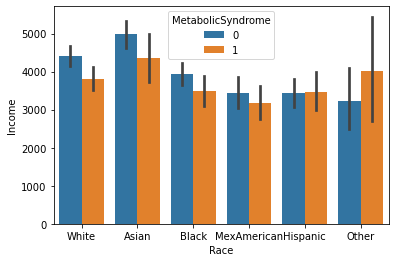

In [44]:
sns.barplot(x=df['Race'],y=df['Income'],hue=df['MetabolicSyndrome'])

<AxesSubplot:xlabel='Albuminuria', ylabel='Income'>

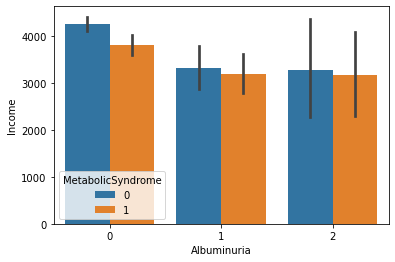

In [45]:
sns.barplot(x=df['Albuminuria'],y=df['Income'],hue=df['MetabolicSyndrome'])

<AxesSubplot:xlabel='Sex', ylabel='Age'>

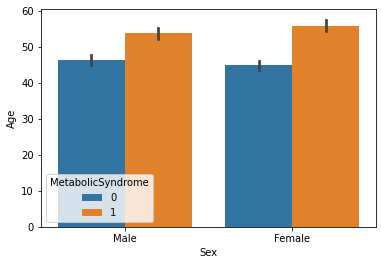

In [46]:
sns.barplot(x=df['Sex'],y=df['Age'],hue=df['MetabolicSyndrome'])

<AxesSubplot:xlabel='Marital', ylabel='Age'>

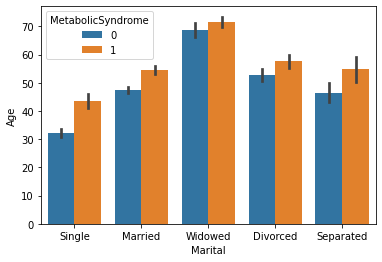

In [47]:
sns.barplot(x=df['Marital'],y=df['Age'],hue=df['MetabolicSyndrome'])

<AxesSubplot:xlabel='Race', ylabel='Age'>

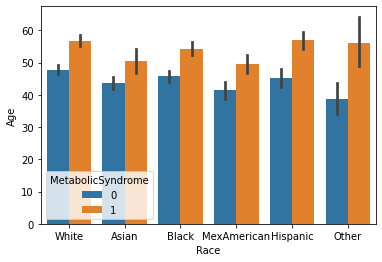

In [48]:
sns.barplot(x=df['Race'],y=df['Age'],hue=df['MetabolicSyndrome'])

<AxesSubplot:xlabel='Albuminuria', ylabel='Age'>

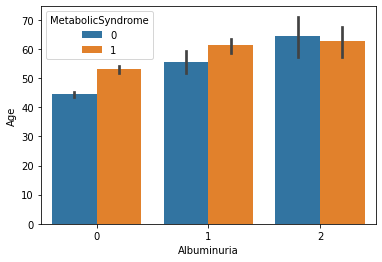

In [49]:
sns.barplot(x=df['Albuminuria'],y=df['Age'],hue=df['MetabolicSyndrome'])

<AxesSubplot:xlabel='Sex', ylabel='BMI'>

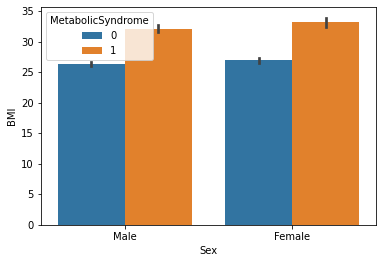

In [50]:
sns.barplot(x=df['Sex'],y=df['BMI'],hue=df['MetabolicSyndrome'])

<AxesSubplot:xlabel='Marital', ylabel='BMI'>

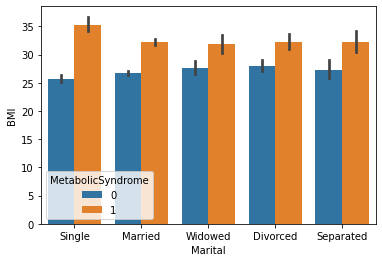

In [51]:
sns.barplot(x=df['Marital'],y=df['BMI'],hue=df['MetabolicSyndrome'])

<AxesSubplot:xlabel='Race', ylabel='BMI'>

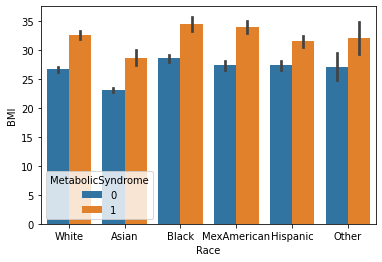

In [52]:
sns.barplot(x=df['Race'],y=df['BMI'],hue=df['MetabolicSyndrome'])

<AxesSubplot:xlabel='Albuminuria', ylabel='BMI'>

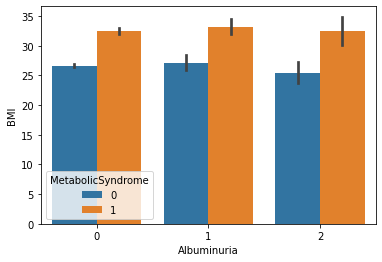

In [53]:
sns.barplot(x=df['Albuminuria'],y=df['BMI'],hue=df['MetabolicSyndrome'])

<AxesSubplot:xlabel='Sex', ylabel='UrAlbCr'>

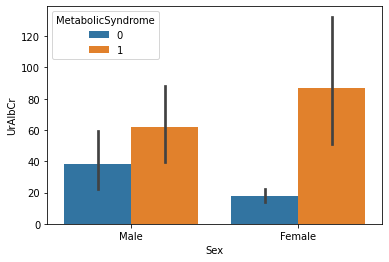

In [54]:
sns.barplot(x=df['Sex'],y=df['UrAlbCr'],hue=df['MetabolicSyndrome'])

<AxesSubplot:xlabel='Marital', ylabel='UrAlbCr'>

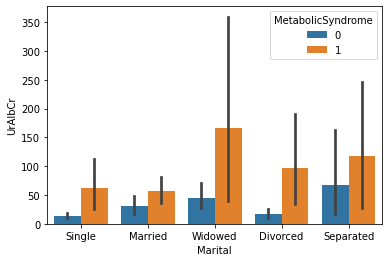

In [55]:
sns.barplot(x=df['Marital'],y=df['UrAlbCr'],hue=df['MetabolicSyndrome'])

<AxesSubplot:xlabel='Race', ylabel='UrAlbCr'>

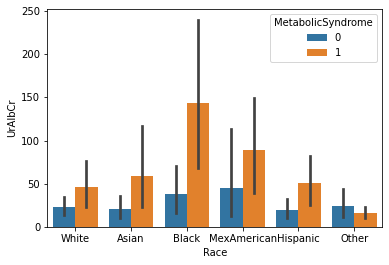

In [56]:
sns.barplot(x=df['Race'],y=df['UrAlbCr'],hue=df['MetabolicSyndrome'])

<AxesSubplot:xlabel='Albuminuria', ylabel='UrAlbCr'>

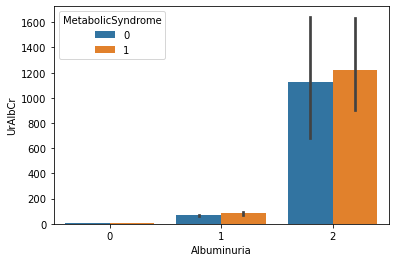

In [57]:
sns.barplot(x=df['Albuminuria'],y=df['UrAlbCr'],hue=df['MetabolicSyndrome'])

<AxesSubplot:xlabel='Sex', ylabel='UricAcid'>

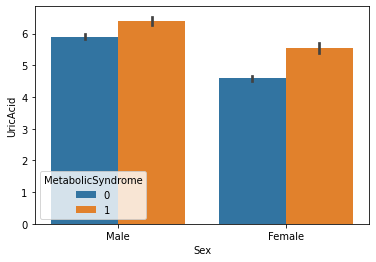

In [58]:
sns.barplot(x=df['Sex'],y=df['UricAcid'],hue=df['MetabolicSyndrome'])

<AxesSubplot:xlabel='Marital', ylabel='UricAcid'>

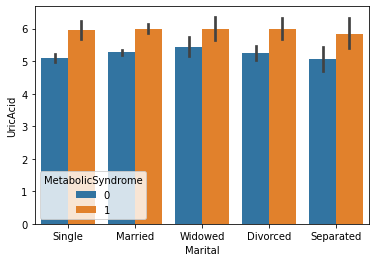

In [59]:
sns.barplot(x=df['Marital'],y=df['UricAcid'],hue=df['MetabolicSyndrome'])

<AxesSubplot:xlabel='Race', ylabel='UricAcid'>

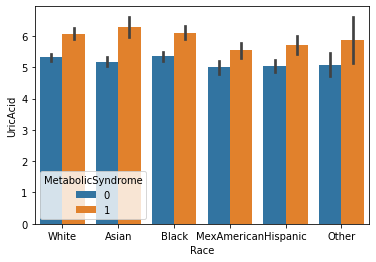

In [60]:
sns.barplot(x=df['Race'],y=df['UricAcid'],hue=df['MetabolicSyndrome'])

<AxesSubplot:xlabel='Albuminuria', ylabel='UricAcid'>

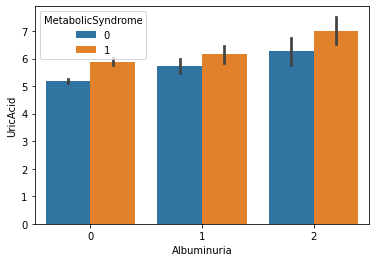

In [61]:
sns.barplot(x=df['Albuminuria'],y=df['UricAcid'],hue=df['MetabolicSyndrome'])

<AxesSubplot:xlabel='Sex', ylabel='BloodGlucose'>

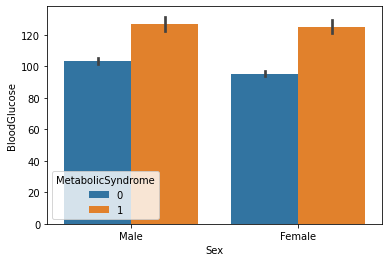

In [62]:
sns.barplot(x=df['Sex'],y=df['BloodGlucose'],hue=df['MetabolicSyndrome'])

<AxesSubplot:xlabel='Marital', ylabel='BloodGlucose'>

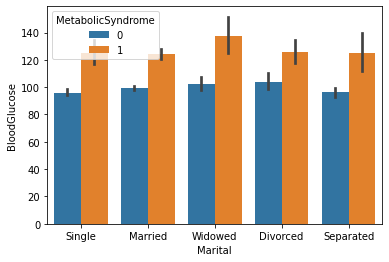

In [63]:
sns.barplot(x=df['Marital'],y=df['BloodGlucose'],hue=df['MetabolicSyndrome'])

<AxesSubplot:xlabel='Race', ylabel='BloodGlucose'>

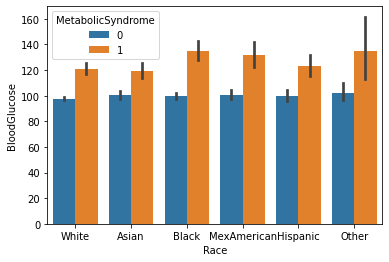

In [64]:
sns.barplot(x=df['Race'],y=df['BloodGlucose'],hue=df['MetabolicSyndrome'])

<AxesSubplot:xlabel='Albuminuria', ylabel='BloodGlucose'>

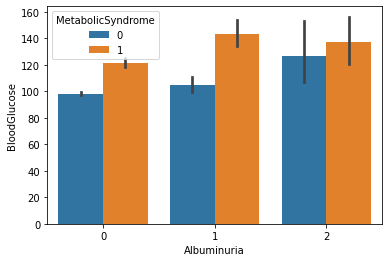

In [65]:
sns.barplot(x=df['Albuminuria'],y=df['BloodGlucose'],hue=df['MetabolicSyndrome'])

<AxesSubplot:xlabel='Sex', ylabel='HDL'>

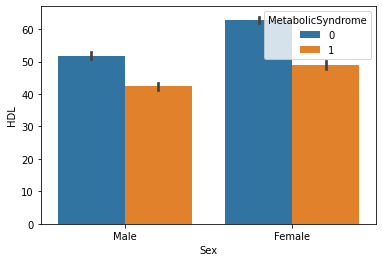

In [66]:
sns.barplot(x=df['Sex'],y=df['HDL'],hue=df['MetabolicSyndrome'])

<AxesSubplot:xlabel='Marital', ylabel='HDL'>

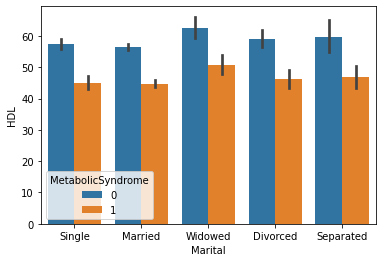

In [67]:
sns.barplot(x=df['Marital'],y=df['HDL'],hue=df['MetabolicSyndrome'])

<AxesSubplot:xlabel='Race', ylabel='HDL'>

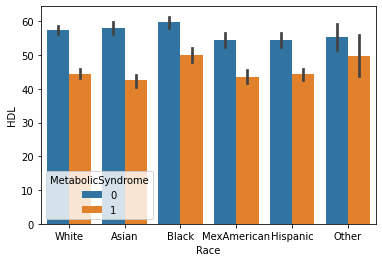

In [68]:
sns.barplot(x=df['Race'],y=df['HDL'],hue=df['MetabolicSyndrome'])

<AxesSubplot:xlabel='Albuminuria', ylabel='HDL'>

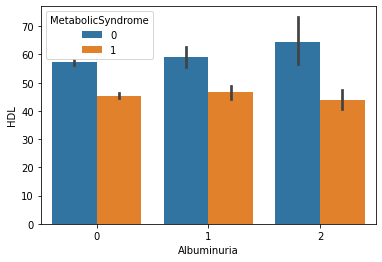

In [69]:
sns.barplot(x=df['Albuminuria'],y=df['HDL'],hue=df['MetabolicSyndrome'])

<AxesSubplot:xlabel='Sex', ylabel='Triglycerides'>

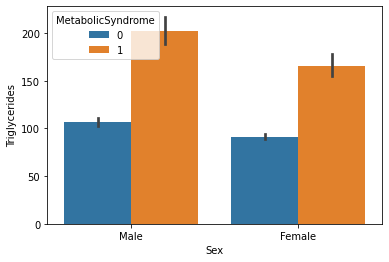

In [70]:
sns.barplot(x=df['Sex'],y=df['Triglycerides'],hue=df['MetabolicSyndrome'])

<AxesSubplot:xlabel='Marital', ylabel='Triglycerides'>

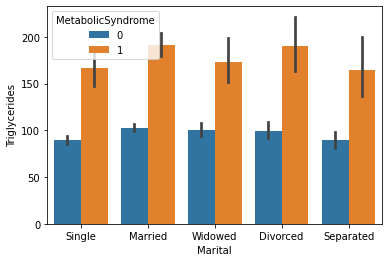

In [71]:
sns.barplot(x=df['Marital'],y=df['Triglycerides'],hue=df['MetabolicSyndrome'])

<AxesSubplot:xlabel='Race', ylabel='Triglycerides'>

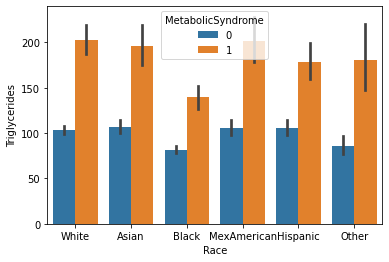

In [72]:
sns.barplot(x=df['Race'],y=df['Triglycerides'],hue=df['MetabolicSyndrome'])

<AxesSubplot:xlabel='Albuminuria', ylabel='Triglycerides'>

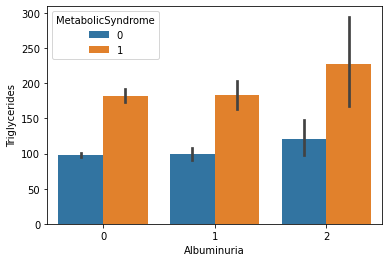

In [73]:
sns.barplot(x=df['Albuminuria'],y=df['Triglycerides'],hue=df['MetabolicSyndrome'])

In [74]:
df

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,22,Male,Single,8200.00000,White,81.000000,23.3,0,3.88,4.9,92,41,84,0
1,44,Female,Married,4500.00000,White,80.100000,23.2,0,8.55,4.5,82,28,56,0
2,21,Male,Single,800.00000,Asian,69.600000,20.1,0,5.07,5.4,107,43,78,0
3,43,Female,Single,2000.00000,Black,120.400000,33.3,0,5.22,5.0,104,73,141,0
4,51,Male,Married,4005.25394,Asian,81.100000,20.1,0,8.13,5.0,95,43,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,48,Female,Married,1000.00000,Other,98.307254,59.7,0,22.11,5.8,152,57,107,0
2397,30,Female,Single,2000.00000,Asian,98.307254,18.0,0,2.90,7.9,91,90,91,0
2398,28,Male,Single,800.00000,MexAmerican,100.800000,29.4,0,2.78,6.2,99,47,84,0
2399,27,Male,Married,8200.00000,MexAmerican,106.600000,31.3,0,4.15,6.2,100,41,124,1


<AxesSubplot:xlabel='MetabolicSyndrome', ylabel='Income'>

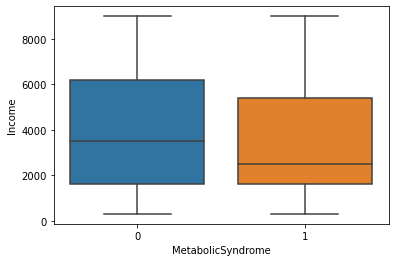

In [75]:
sns.boxplot(x=df['MetabolicSyndrome'],y=df['Income'])

<AxesSubplot:xlabel='MetabolicSyndrome', ylabel='BMI'>

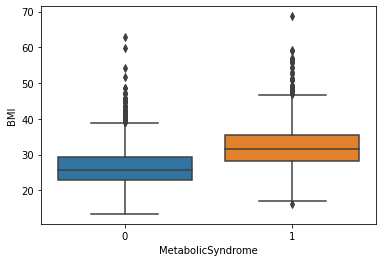

In [76]:
sns.boxplot(x=df['MetabolicSyndrome'],y=df['BMI'])

<AxesSubplot:xlabel='MetabolicSyndrome', ylabel='UrAlbCr'>

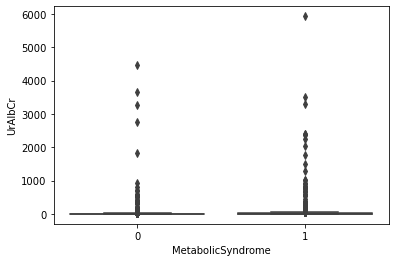

In [77]:
sns.boxplot(x=df['MetabolicSyndrome'],y=df['UrAlbCr'])

<AxesSubplot:xlabel='MetabolicSyndrome', ylabel='UricAcid'>

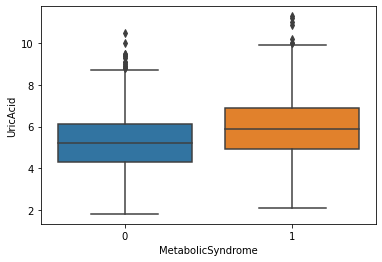

In [78]:
sns.boxplot(x=df['MetabolicSyndrome'],y=df['UricAcid'])

<AxesSubplot:xlabel='MetabolicSyndrome', ylabel='WaistCirc'>

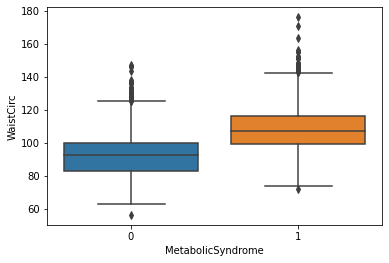

In [79]:
sns.boxplot(x=df['MetabolicSyndrome'],y=df['WaistCirc'])

<AxesSubplot:xlabel='MetabolicSyndrome', ylabel='BloodGlucose'>

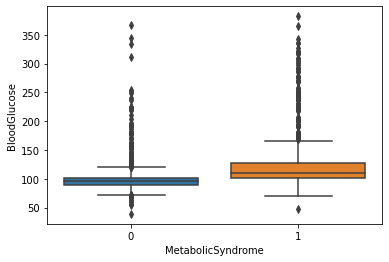

In [80]:
sns.boxplot(x=df['MetabolicSyndrome'],y=df['BloodGlucose'])

<AxesSubplot:xlabel='MetabolicSyndrome', ylabel='HDL'>

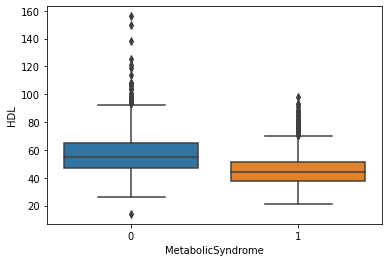

In [81]:
sns.boxplot(x=df['MetabolicSyndrome'],y=df['HDL'])

<AxesSubplot:xlabel='MetabolicSyndrome', ylabel='Triglycerides'>

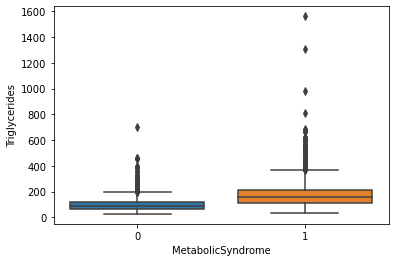

In [82]:

sns.boxplot(x=df['MetabolicSyndrome'],y=df['Triglycerides'])

<AxesSubplot:xlabel='MetabolicSyndrome', ylabel='Age'>

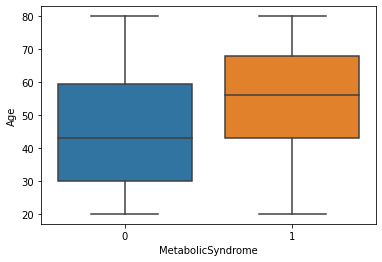

In [83]:
sns.boxplot(x=df['MetabolicSyndrome'],y=df['Age'])

<AxesSubplot:xlabel='MetabolicSyndrome', ylabel='Income'>

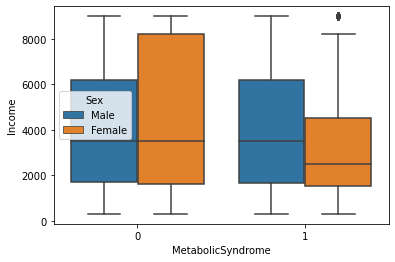

In [84]:
sns.boxplot(x=df['MetabolicSyndrome'],y=df['Income'],hue=df['Sex'])

<AxesSubplot:xlabel='MetabolicSyndrome', ylabel='Income'>

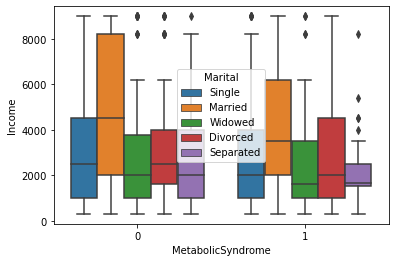

In [85]:
sns.boxplot(x=df['MetabolicSyndrome'],y=df['Income'],hue=df['Marital'])

<AxesSubplot:xlabel='MetabolicSyndrome', ylabel='Income'>

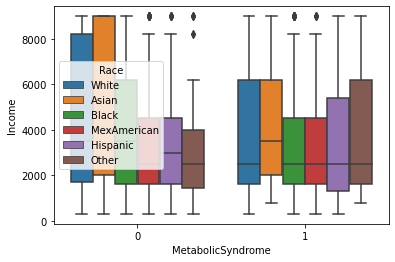

In [86]:
sns.boxplot(x=df['MetabolicSyndrome'],y=df['Income'],hue=df['Race'])

<AxesSubplot:xlabel='MetabolicSyndrome', ylabel='Income'>

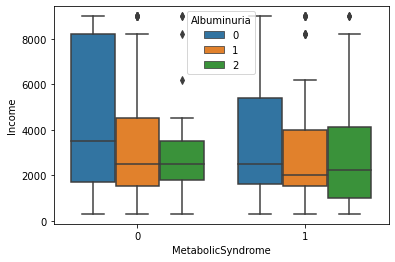

In [87]:
sns.boxplot(x=df['MetabolicSyndrome'],y=df['Income'],hue=df['Albuminuria'])

<AxesSubplot:xlabel='MetabolicSyndrome', ylabel='Age'>

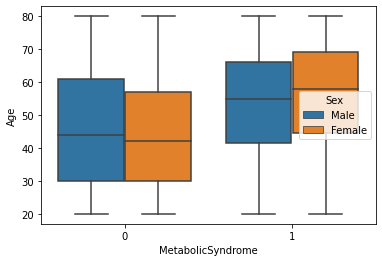

In [88]:
sns.boxplot(x=df['MetabolicSyndrome'],y=df['Age'],hue=df['Sex'])

<AxesSubplot:xlabel='MetabolicSyndrome', ylabel='Age'>

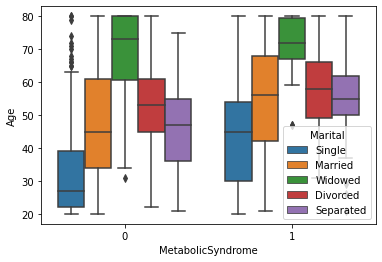

In [89]:
sns.boxplot(x=df['MetabolicSyndrome'],y=df['Age'],hue=df['Marital'])

<AxesSubplot:xlabel='MetabolicSyndrome', ylabel='Age'>

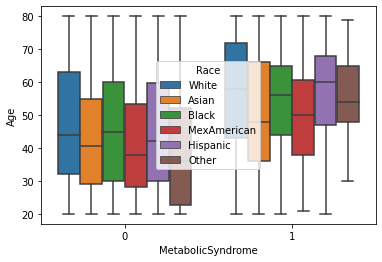

In [90]:
sns.boxplot(x=df['MetabolicSyndrome'],y=df['Age'],hue=df['Race'])

<AxesSubplot:xlabel='MetabolicSyndrome', ylabel='Age'>

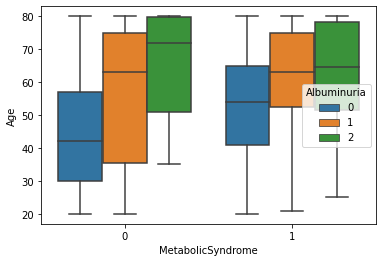

In [91]:
sns.boxplot(x=df['MetabolicSyndrome'],y=df['Age'],hue=df['Albuminuria'])

<AxesSubplot:xlabel='MetabolicSyndrome', ylabel='BMI'>

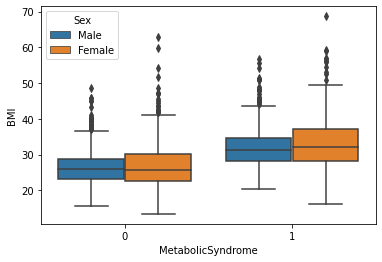

In [92]:
sns.boxplot(x=df['MetabolicSyndrome'],y=df['BMI'],hue=df['Sex'])

<AxesSubplot:xlabel='MetabolicSyndrome', ylabel='BMI'>

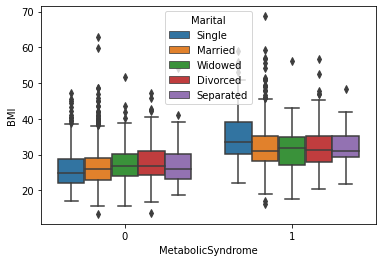

In [93]:
sns.boxplot(x=df['MetabolicSyndrome'],y=df['BMI'],hue=df['Marital'])

<AxesSubplot:xlabel='MetabolicSyndrome', ylabel='BMI'>

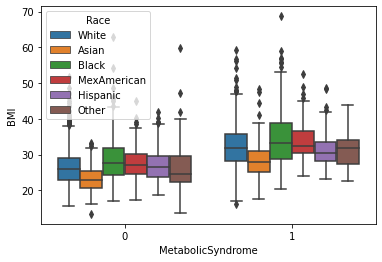

In [94]:
sns.boxplot(x=df['MetabolicSyndrome'],y=df['BMI'],hue=df['Race'])

<AxesSubplot:xlabel='MetabolicSyndrome', ylabel='BMI'>

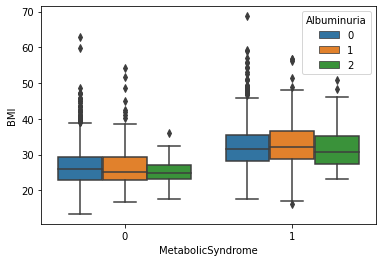

In [95]:
sns.boxplot(x=df['MetabolicSyndrome'],y=df['BMI'],hue=df['Albuminuria'])

<AxesSubplot:xlabel='MetabolicSyndrome', ylabel='HDL'>

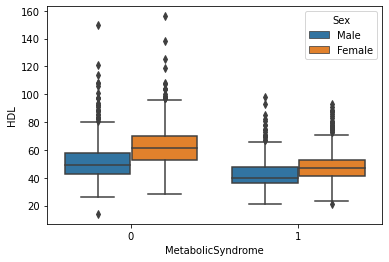

In [96]:
sns.boxplot(x=df['MetabolicSyndrome'],y=df['HDL'],hue=df['Sex'])

<AxesSubplot:xlabel='MetabolicSyndrome', ylabel='HDL'>

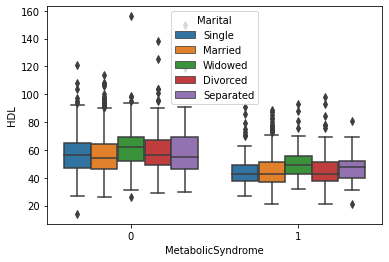

In [97]:
sns.boxplot(x=df['MetabolicSyndrome'],y=df['HDL'],hue=df['Marital'])

<AxesSubplot:xlabel='MetabolicSyndrome', ylabel='HDL'>

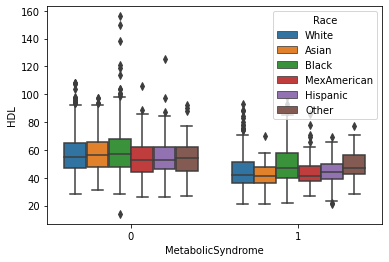

In [98]:
sns.boxplot(x=df['MetabolicSyndrome'],y=df['HDL'],hue=df['Race'])

<AxesSubplot:xlabel='MetabolicSyndrome', ylabel='HDL'>

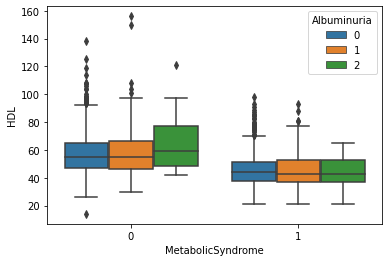

In [99]:
sns.boxplot(x=df['MetabolicSyndrome'],y=df['HDL'],hue=df['Albuminuria'])

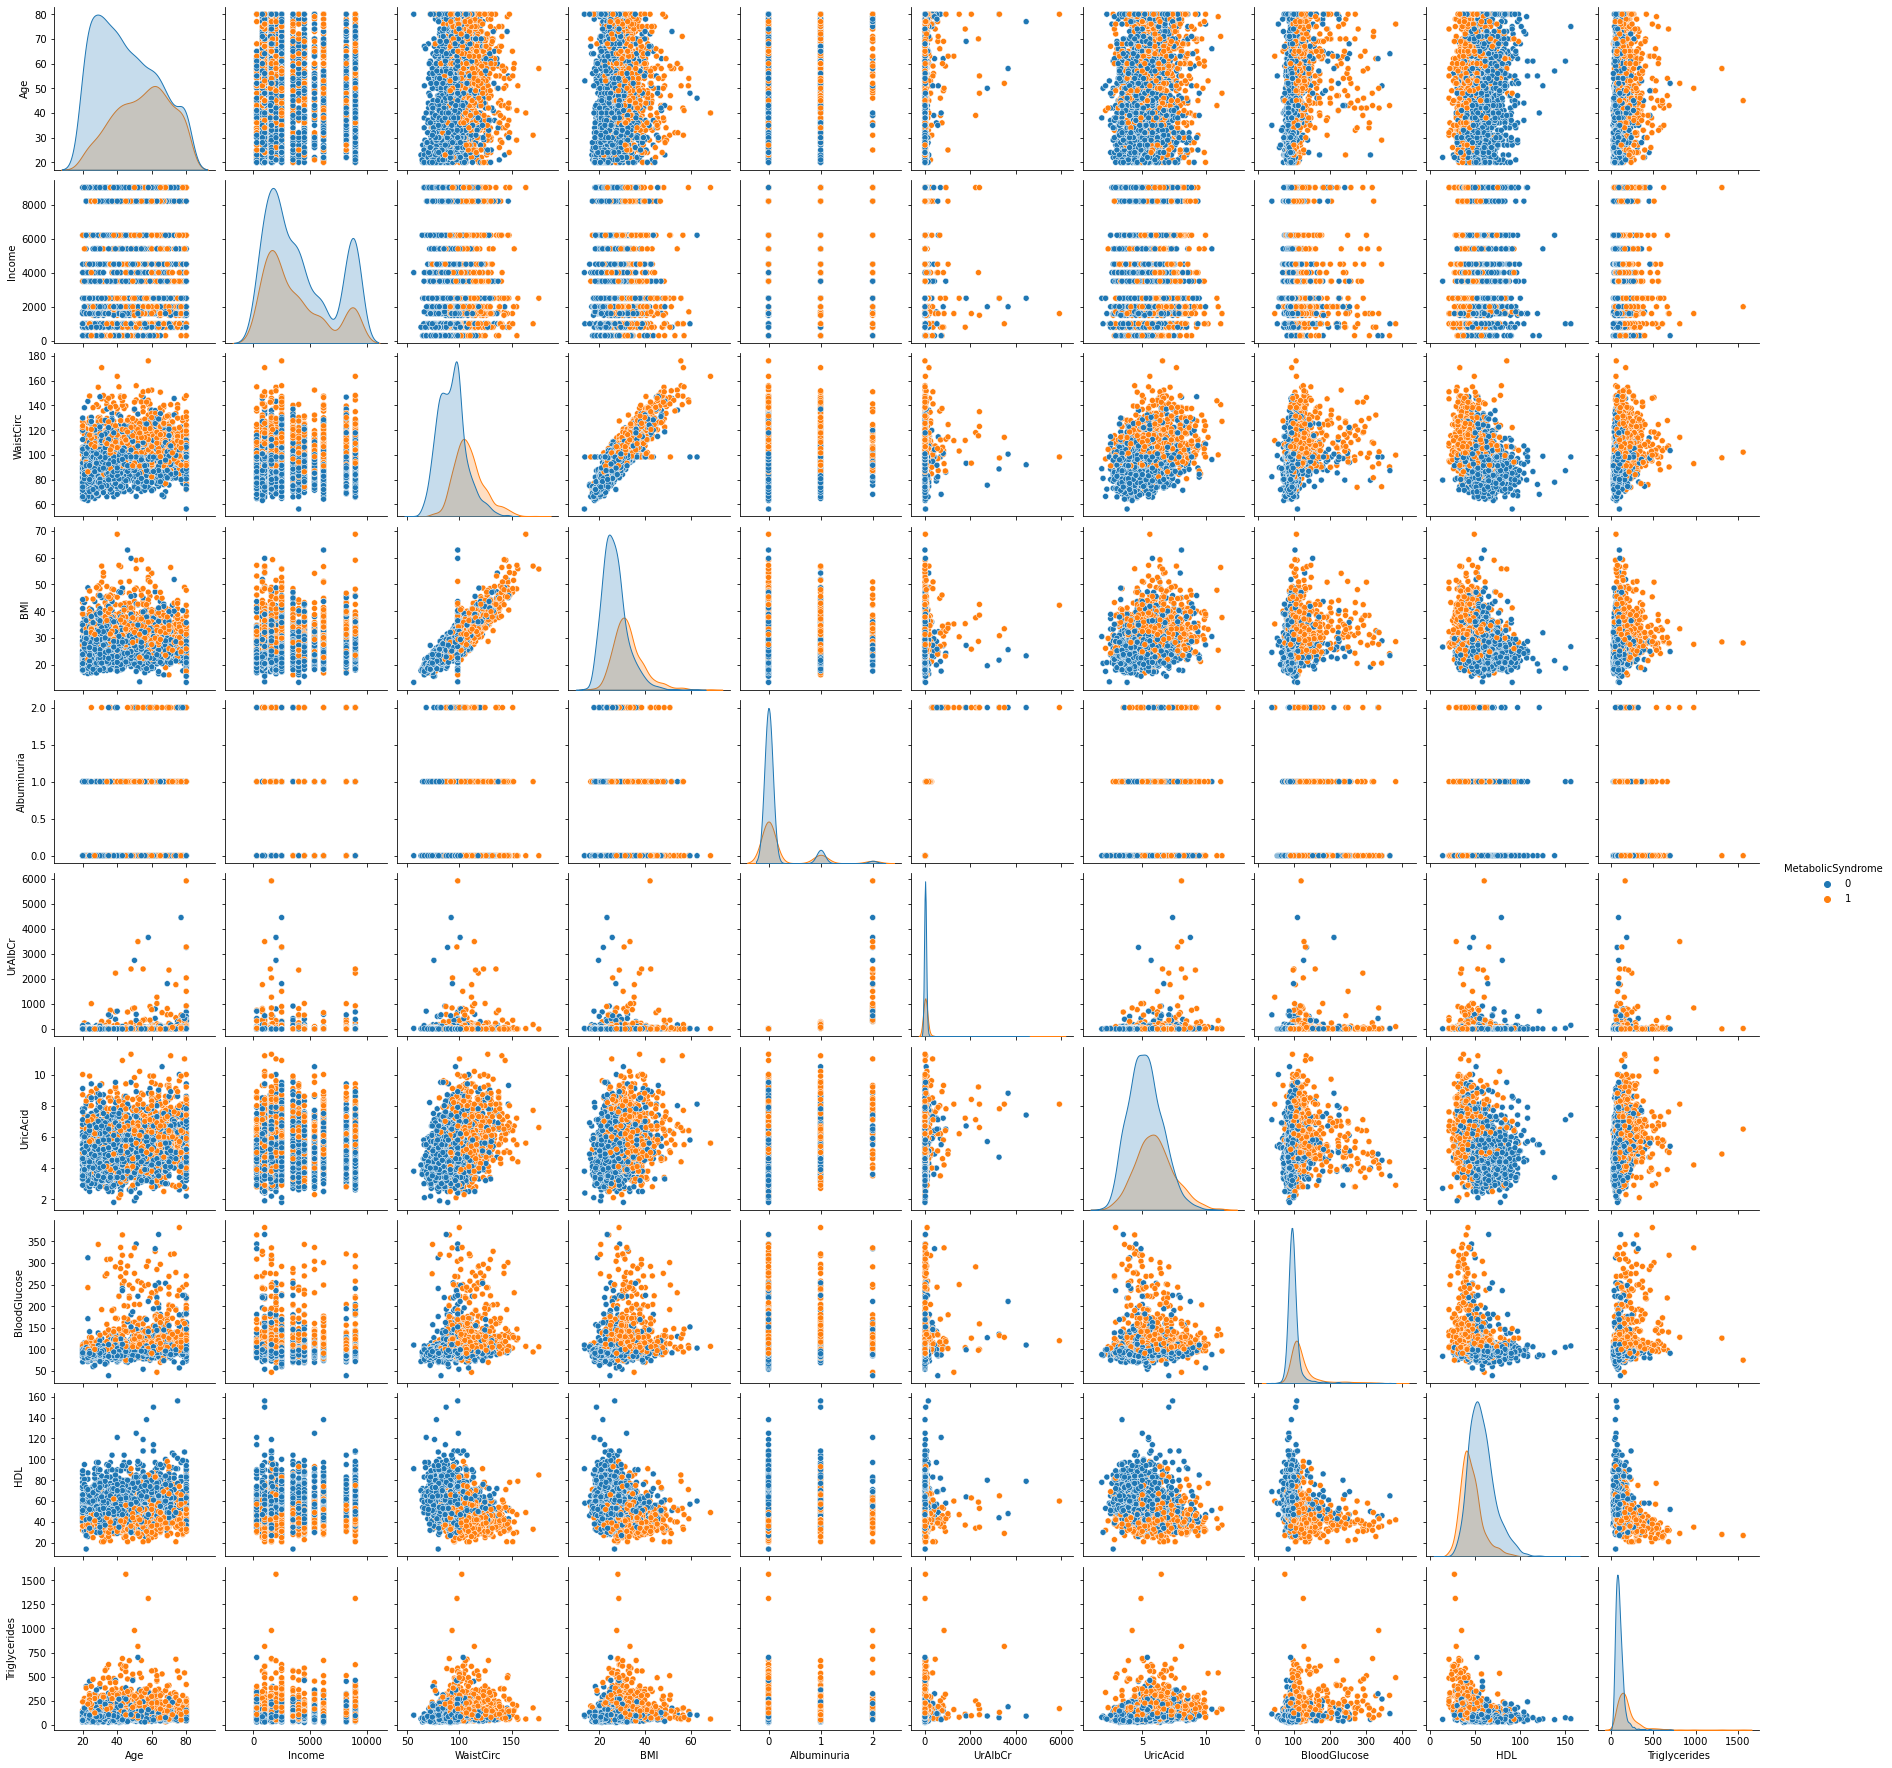

In [100]:
sns.pairplot(data=df,hue="MetabolicSyndrome")

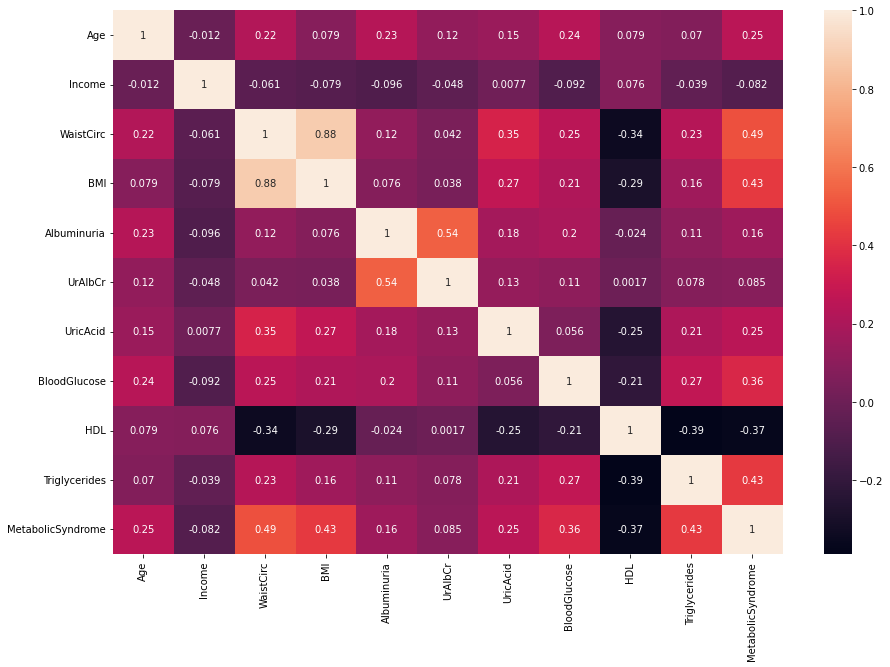

In [101]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

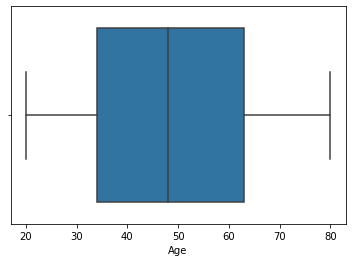

In [102]:
sns.boxplot(df['Age'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

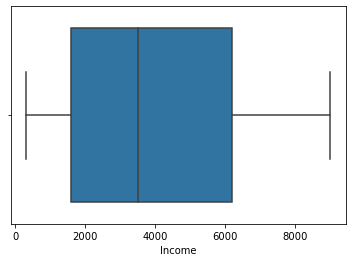

In [103]:
sns.boxplot(df['Income'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WaistCirc'>

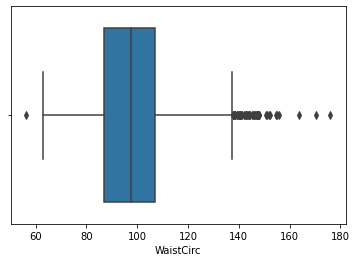

In [104]:
sns.boxplot(df['WaistCirc'])

In [105]:
q1=df['WaistCirc'].quantile(0.25)

In [106]:
q3=df['WaistCirc'].quantile(0.75)

In [107]:
IQR=q3-q1

In [108]:
lower=q1-1.5*IQR

In [109]:
upper=q3+1.5*IQR

In [110]:
df=df[(df['WaistCirc']>lower) & (df['WaistCirc']<upper)]

In [111]:
df

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,22,Male,Single,8200.00000,White,81.000000,23.3,0,3.88,4.9,92,41,84,0
1,44,Female,Married,4500.00000,White,80.100000,23.2,0,8.55,4.5,82,28,56,0
2,21,Male,Single,800.00000,Asian,69.600000,20.1,0,5.07,5.4,107,43,78,0
3,43,Female,Single,2000.00000,Black,120.400000,33.3,0,5.22,5.0,104,73,141,0
4,51,Male,Married,4005.25394,Asian,81.100000,20.1,0,8.13,5.0,95,43,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,48,Female,Married,1000.00000,Other,98.307254,59.7,0,22.11,5.8,152,57,107,0
2397,30,Female,Single,2000.00000,Asian,98.307254,18.0,0,2.90,7.9,91,90,91,0
2398,28,Male,Single,800.00000,MexAmerican,100.800000,29.4,0,2.78,6.2,99,47,84,0
2399,27,Male,Married,8200.00000,MexAmerican,106.600000,31.3,0,4.15,6.2,100,41,124,1


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMI'>

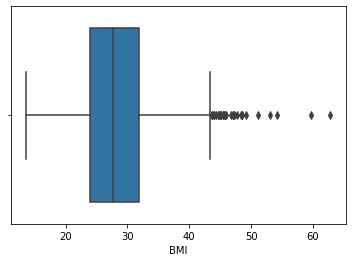

In [112]:
sns.boxplot(df['BMI'])

In [113]:
q1=df['BMI'].quantile(0.25)

In [114]:
q3=df['BMI'].quantile(0.75)

In [115]:
IQR=q3-q1

In [116]:
lower=q1-1.5*IQR

In [117]:
upper=q3+1.5*IQR

In [118]:
df=df[(df['BMI']>lower) & (df['BMI']<upper)]

In [119]:
df

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,22,Male,Single,8200.00000,White,81.000000,23.3,0,3.88,4.9,92,41,84,0
1,44,Female,Married,4500.00000,White,80.100000,23.2,0,8.55,4.5,82,28,56,0
2,21,Male,Single,800.00000,Asian,69.600000,20.1,0,5.07,5.4,107,43,78,0
3,43,Female,Single,2000.00000,Black,120.400000,33.3,0,5.22,5.0,104,73,141,0
4,51,Male,Married,4005.25394,Asian,81.100000,20.1,0,8.13,5.0,95,43,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,65,Female,Married,5400.00000,MexAmerican,98.500000,29.4,0,5.51,6.7,114,49,165,1
2397,30,Female,Single,2000.00000,Asian,98.307254,18.0,0,2.90,7.9,91,90,91,0
2398,28,Male,Single,800.00000,MexAmerican,100.800000,29.4,0,2.78,6.2,99,47,84,0
2399,27,Male,Married,8200.00000,MexAmerican,106.600000,31.3,0,4.15,6.2,100,41,124,1


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='UrAlbCr'>

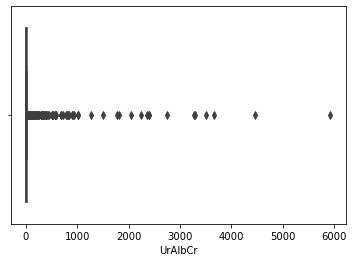

In [120]:
sns.boxplot(df['UrAlbCr'])

In [121]:
q1=df['UrAlbCr'].quantile(0.25)

In [122]:
q3=df['UrAlbCr'].quantile(0.75)

In [123]:
IQR=q3-q1

In [124]:
lower=q1-1.5*IQR

In [125]:
upper=q3+1.5*IQR

In [126]:
df=df[(df['UrAlbCr']>lower) & (df['UrAlbCr']<upper)]

In [127]:
df

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,22,Male,Single,8200.00000,White,81.000000,23.3,0,3.88,4.9,92,41,84,0
1,44,Female,Married,4500.00000,White,80.100000,23.2,0,8.55,4.5,82,28,56,0
2,21,Male,Single,800.00000,Asian,69.600000,20.1,0,5.07,5.4,107,43,78,0
3,43,Female,Single,2000.00000,Black,120.400000,33.3,0,5.22,5.0,104,73,141,0
4,51,Male,Married,4005.25394,Asian,81.100000,20.1,0,8.13,5.0,95,43,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,65,Female,Married,5400.00000,MexAmerican,98.500000,29.4,0,5.51,6.7,114,49,165,1
2397,30,Female,Single,2000.00000,Asian,98.307254,18.0,0,2.90,7.9,91,90,91,0
2398,28,Male,Single,800.00000,MexAmerican,100.800000,29.4,0,2.78,6.2,99,47,84,0
2399,27,Male,Married,8200.00000,MexAmerican,106.600000,31.3,0,4.15,6.2,100,41,124,1


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='UricAcid'>

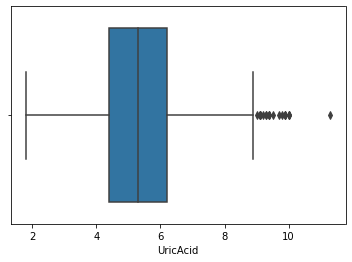

In [128]:
sns.boxplot(df['UricAcid'])

In [129]:
q1=df['UricAcid'].quantile(0.25)

In [130]:
q3=df['UricAcid'].quantile(0.75)

In [131]:
IQR=q3-q1

In [132]:
lower=q1-1.5*IQR

In [133]:
upper=q3+1.5*IQR

In [134]:
df=df[(df['UricAcid']>lower) & (df['UricAcid']<upper)]

In [135]:
df

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,22,Male,Single,8200.00000,White,81.000000,23.3,0,3.88,4.9,92,41,84,0
1,44,Female,Married,4500.00000,White,80.100000,23.2,0,8.55,4.5,82,28,56,0
2,21,Male,Single,800.00000,Asian,69.600000,20.1,0,5.07,5.4,107,43,78,0
3,43,Female,Single,2000.00000,Black,120.400000,33.3,0,5.22,5.0,104,73,141,0
4,51,Male,Married,4005.25394,Asian,81.100000,20.1,0,8.13,5.0,95,43,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,65,Female,Married,5400.00000,MexAmerican,98.500000,29.4,0,5.51,6.7,114,49,165,1
2397,30,Female,Single,2000.00000,Asian,98.307254,18.0,0,2.90,7.9,91,90,91,0
2398,28,Male,Single,800.00000,MexAmerican,100.800000,29.4,0,2.78,6.2,99,47,84,0
2399,27,Male,Married,8200.00000,MexAmerican,106.600000,31.3,0,4.15,6.2,100,41,124,1


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BloodGlucose'>

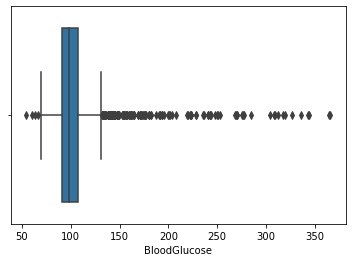

In [136]:
sns.boxplot(df['BloodGlucose'])

In [137]:
q1=df['BloodGlucose'].quantile(0.25)

In [138]:
q3=df['BloodGlucose'].quantile(0.75)

In [139]:
IQR=q3-q1

In [140]:
lower=q1-1.5*IQR

In [141]:
upper=q3+1.5*IQR

In [142]:
df=df[(df['BloodGlucose']>lower) & (df['BloodGlucose']<upper)]

In [143]:
df

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,22,Male,Single,8200.00000,White,81.000000,23.3,0,3.88,4.9,92,41,84,0
1,44,Female,Married,4500.00000,White,80.100000,23.2,0,8.55,4.5,82,28,56,0
2,21,Male,Single,800.00000,Asian,69.600000,20.1,0,5.07,5.4,107,43,78,0
3,43,Female,Single,2000.00000,Black,120.400000,33.3,0,5.22,5.0,104,73,141,0
4,51,Male,Married,4005.25394,Asian,81.100000,20.1,0,8.13,5.0,95,43,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,65,Female,Married,5400.00000,MexAmerican,98.500000,29.4,0,5.51,6.7,114,49,165,1
2397,30,Female,Single,2000.00000,Asian,98.307254,18.0,0,2.90,7.9,91,90,91,0
2398,28,Male,Single,800.00000,MexAmerican,100.800000,29.4,0,2.78,6.2,99,47,84,0
2399,27,Male,Married,8200.00000,MexAmerican,106.600000,31.3,0,4.15,6.2,100,41,124,1


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HDL'>

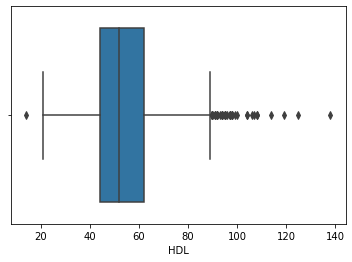

In [144]:
sns.boxplot(df['HDL'])

In [145]:
q1=df['HDL'].quantile(0.25)

In [146]:
q3=df['HDL'].quantile(0.75)

In [147]:
IQR=q3-q1

In [148]:
lower=q1-1.5*IQR

In [149]:
upper=q3+1.5*IQR

In [150]:
df=df[(df['HDL']>lower) & (df['HDL']<upper)]

In [151]:
df

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,22,Male,Single,8200.00000,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,44,Female,Married,4500.00000,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,21,Male,Single,800.00000,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,43,Female,Single,2000.00000,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,51,Male,Married,4005.25394,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,31,Male,Married,2500.00000,Asian,74.0,20.6,0,2.00,6.7,95,64,81,0
2395,65,Female,Married,5400.00000,MexAmerican,98.5,29.4,0,5.51,6.7,114,49,165,1
2398,28,Male,Single,800.00000,MexAmerican,100.8,29.4,0,2.78,6.2,99,47,84,0
2399,27,Male,Married,8200.00000,MexAmerican,106.6,31.3,0,4.15,6.2,100,41,124,1


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Triglycerides'>

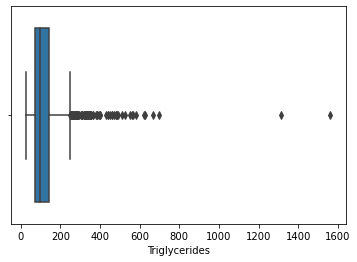

In [152]:
sns.boxplot(df['Triglycerides'])

In [153]:
q1=df['Triglycerides'].quantile(0.25)

In [154]:
q3=df['Triglycerides'].quantile(0.75)

In [155]:
IQR=q3-q1

In [156]:
lower=q1-1.5*IQR

In [157]:
upper=q3+1.5*IQR

In [158]:
df=df[(df['Triglycerides']>lower) & (df['Triglycerides']<upper)]

In [159]:
df

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,22,Male,Single,8200.00000,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,44,Female,Married,4500.00000,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,21,Male,Single,800.00000,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,43,Female,Single,2000.00000,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,51,Male,Married,4005.25394,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,31,Male,Married,2500.00000,Asian,74.0,20.6,0,2.00,6.7,95,64,81,0
2395,65,Female,Married,5400.00000,MexAmerican,98.5,29.4,0,5.51,6.7,114,49,165,1
2398,28,Male,Single,800.00000,MexAmerican,100.8,29.4,0,2.78,6.2,99,47,84,0
2399,27,Male,Married,8200.00000,MexAmerican,106.6,31.3,0,4.15,6.2,100,41,124,1


In [160]:
df=df.drop(["BMI","Albuminuria","Triglycerides"],axis=1)

In [161]:
df

,Age,Sex,Marital,Income,Race,WaistCirc,UrAlbCr,UricAcid,BloodGlucose,HDL,MetabolicSyndrome
0,22,Male,Single,8200.00000,White,81.0,3.88,4.9,92,41,0
1,44,Female,Married,4500.00000,White,80.1,8.55,4.5,82,28,0
2,21,Male,Single,800.00000,Asian,69.6,5.07,5.4,107,43,0
3,43,Female,Single,2000.00000,Black,120.4,5.22,5.0,104,73,0
4,51,Male,Married,4005.25394,Asian,81.1,8.13,5.0,95,43,0
...,...,...,...,...,...,...,...,...,...,...,...
2394,31,Male,Married,2500.00000,Asian,74.0,2.00,6.7,95,64,0
2395,65,Female,Married,5400.00000,MexAmerican,98.5,5.51,6.7,114,49,1
2398,28,Male,Single,800.00000,MexAmerican,100.8,2.78,6.2,99,47,0
2399,27,Male,Married,8200.00000,MexAmerican,106.6,4.15,6.2,100,41,1


In [162]:
le=LabelEncoder()


In [163]:
df['Sex']=le.fit_transform(df['Sex'])


In [164]:
df['Marital']=le.fit_transform(df['Marital'])


In [165]:
df['Race']=le.fit_transform(df['Race'])


In [166]:
df

,Age,Sex,Marital,Income,Race,WaistCirc,UrAlbCr,UricAcid,BloodGlucose,HDL,MetabolicSyndrome
0,22,1,3,8200.00000,5,81.0,3.88,4.9,92,41,0
1,44,0,1,4500.00000,5,80.1,8.55,4.5,82,28,0
2,21,1,3,800.00000,0,69.6,5.07,5.4,107,43,0
3,43,0,3,2000.00000,1,120.4,5.22,5.0,104,73,0
4,51,1,1,4005.25394,0,81.1,8.13,5.0,95,43,0
...,...,...,...,...,...,...,...,...,...,...,...
2394,31,1,1,2500.00000,0,74.0,2.00,6.7,95,64,0
2395,65,0,1,5400.00000,3,98.5,5.51,6.7,114,49,1
2398,28,1,3,800.00000,3,100.8,2.78,6.2,99,47,0
2399,27,1,1,8200.00000,3,106.6,4.15,6.2,100,41,1


In [167]:
X=df.drop('MetabolicSyndrome',axis=1)

In [168]:
y=df['MetabolicSyndrome']

In [169]:
sc=StandardScaler()

In [170]:
X=sc.fit_transform(X)


In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [172]:
X_train.shape

(1328, 10)

In [173]:
X_test.shape

(332, 10)

In [174]:
y_train.shape

(1328,)

In [175]:
y_test.shape

(332,)

# RandomForestClassifier

In [176]:
rfc=RandomForestClassifier()

In [177]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [178]:
y_pred=rfc.predict(X_train)


In [179]:
accuracy_score(y_train,y_pred)

1.0

In [180]:
y_pred=rfc.predict(X_test)


In [181]:
accuracy_score(y_test,y_pred)

0.8855421686746988

In [182]:
KF=KFold(5)


In [183]:
scores=cross_val_score(rfc,X_test,y_test,cv=KF)


In [184]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.7910447761194029
1 0.8208955223880597
2 0.8484848484848485
3 0.8787878787878788
4 0.8484848484848485


In [185]:
scores.mean()

0.8375395748530077

In [186]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       262
           1       0.75      0.69      0.72        70

    accuracy                           0.89       332
   macro avg       0.83      0.81      0.82       332
weighted avg       0.88      0.89      0.88       332



# LogisticRegression

In [187]:
lr=LogisticRegression()


In [188]:
lr.fit(X_train,y_train)

LogisticRegression()

In [189]:
y_pred=lr.predict(X_train)


In [190]:
accuracy_score(y_train,y_pred)

0.8546686746987951

In [191]:
y_pred=lr.predict(X_test)


In [192]:
accuracy_score(y_test,y_pred)

0.8493975903614458

In [193]:
KF=KFold(5)


In [194]:
scores=cross_val_score(lr,X_test,y_test,cv=KF)


In [195]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.835820895522388
1 0.8208955223880597
2 0.8333333333333334
3 0.8333333333333334
4 0.8333333333333334


In [196]:
scores.mean()

0.8313432835820895

In [197]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       262
           1       0.64      0.66      0.65        70

    accuracy                           0.85       332
   macro avg       0.77      0.78      0.78       332
weighted avg       0.85      0.85      0.85       332



# KNeighborsClassifier

In [198]:
knc=KNeighborsClassifier()


In [199]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [200]:
y_pred=knc.predict(X_train)


In [201]:
accuracy_score(y_train,y_pred)

0.8682228915662651

In [202]:
y_pred=knc.predict(X_test)


In [203]:
accuracy_score(y_test,y_pred)

0.8403614457831325

In [204]:
KF=KFold(5)


In [205]:
scores=cross_val_score(knc,X_test,y_test,cv=KF)


In [206]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.8059701492537313
1 0.8059701492537313
2 0.8636363636363636
3 0.803030303030303
4 0.8636363636363636


In [207]:
scores.mean()

0.8284486657620984

In [208]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       262
           1       0.63      0.57      0.60        70

    accuracy                           0.84       332
   macro avg       0.76      0.74      0.75       332
weighted avg       0.84      0.84      0.84       332



# XGBClassifier

In [209]:
xgb_i=xgb.XGBClassifier()

In [210]:
xgb_i.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [211]:
y_pred=xgb_i.predict(X_train)


In [212]:
accuracy_score(y_train,y_pred)

1.0

In [213]:
y_pred=xgb_i.predict(X_test)


In [214]:
accuracy_score(y_test,y_pred)

0.8855421686746988

In [215]:
KF=KFold(5)


In [216]:
scores=cross_val_score(xgb_i,X_test,y_test,cv=KF)


In [217]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.8208955223880597
1 0.835820895522388
2 0.7878787878787878
3 0.8787878787878788
4 0.8636363636363636


In [218]:
scores.mean()

0.8374038896426956

In [219]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       262
           1       0.72      0.74      0.73        70

    accuracy                           0.89       332
   macro avg       0.83      0.83      0.83       332
weighted avg       0.89      0.89      0.89       332



# DecisionTreeClassifier

In [220]:
dtc=DecisionTreeClassifier()


In [221]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [222]:
y_pred=dtc.predict(X_train)


In [223]:
accuracy_score(y_train,y_pred)

1.0

In [224]:
y_pred=dtc.predict(X_test)


In [225]:
accuracy_score(y_test,y_pred)

0.8373493975903614

In [226]:
KF=KFold(5)


In [227]:
scores=cross_val_score(dtc,X_test,y_test,cv=KF)


In [228]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.7611940298507462
1 0.7910447761194029
2 0.6818181818181818
3 0.8333333333333334
4 0.8333333333333334


In [229]:
scores.mean()

0.7801447308909996

In [230]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       262
           1       0.60      0.69      0.64        70

    accuracy                           0.84       332
   macro avg       0.76      0.78      0.77       332
weighted avg       0.85      0.84      0.84       332



# Naive Bayes Classifier

In [231]:
model=GaussianNB()


In [232]:
model.fit(X_train,y_train)

GaussianNB()

In [233]:
y_pred=model.predict(X_train)


In [234]:
accuracy_score(y_train,y_pred)

0.8260542168674698

In [235]:
y_pred=model.predict(X_test)


In [236]:
accuracy_score(y_test,y_pred)

0.8072289156626506

In [237]:
KF=KFold(5)


In [238]:
scores=cross_val_score(model,X_test,y_test,cv=KF)


In [239]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.8208955223880597
1 0.7313432835820896
2 0.8181818181818182
3 0.8181818181818182
4 0.8636363636363636


In [240]:
scores.mean()

0.8104477611940298

In [241]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       262
           1       0.54      0.64      0.58        70

    accuracy                           0.81       332
   macro avg       0.72      0.75      0.73       332
weighted avg       0.82      0.81      0.81       332



# ANN

In [242]:
model=keras.Sequential([
    keras.layers.Dense(15,input_shape=(10,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [243]:
model.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [244]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
42/42 [==============================] - 1s 4ms/step - loss: 0.5630 - accuracy: 0.7199
Epoch 2/10
42/42 [==============================] - 0s 3ms/step - loss: 0.4692 - accuracy: 0.7786
Epoch 3/10
42/42 [==============================] - 0s 3ms/step - loss: 0.4257 - accuracy: 0.7974
Epoch 4/10
42/42 [==============================] - 0s 4ms/step - loss: 0.3979 - accuracy: 0.8148
Epoch 5/10
42/42 [==============================] - 0s 3ms/step - loss: 0.3792 - accuracy: 0.8276
Epoch 6/10
42/42 [==============================] - 0s 3ms/step - loss: 0.3668 - accuracy: 0.8404
Epoch 7/10
42/42 [==============================] - 0s 3ms/step - loss: 0.3562 - accuracy: 0.8396
Epoch 8/10
42/42 [==============================] - 0s 4ms/step - loss: 0.3475 - accuracy: 0.8471
Epoch 9/10
42/42 [==============================] - 0s 3ms/step - loss: 0.3420 - accuracy: 0.8486
Epoch 10/10
42/42 [==============================] - 0s 3ms/step - loss: 0.3355 - accuracy: 0.8539


In [245]:
model.evaluate(X_test,y_test)

11/11 [==============================] - 0s 3ms/step - loss: 0.3261 - accuracy: 0.8494


[0.32608562707901, 0.849397599697113]

In [246]:
y_pred=model.predict(X_test)

11/11 [==============================] - 0s 2ms/step


In [247]:
y_pred[:10]

array([[0.1860323 ],
       [0.02877804],
       [0.16582106],
       [0.05903589],
       [0.17418517],
       [0.02498481],
       [0.83310443],
       [0.29370514],
       [0.00296508],
       [0.21759962]], dtype=float32)

In [248]:
y_test[:10]

2392    0
529     0
2346    0
1597    0
1632    0
1676    0
2362    1
1364    0
70      0
870     0
Name: MetabolicSyndrome, dtype: int64

In [249]:
ypred=[]
for i in y_pred:
    if i>0.5:
        ypred.append(1)
    else:
        ypred.append(0)

In [250]:
ypred[:10]

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]